In [15]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

## Constants

In [59]:
DATA_PATH = '../data' # Need to have the data as CSV files in this path
VISU_PATH = '../visualizations' # Path for saving the visualization images

## Scripts for loading data

In [3]:
# This is for if you need to clone the data repo and extract data csv files

# git clone https://github.com/Compensate-Operations/emission-sample-data.git

# !for i in /emission-sample-data/datasets/textile-v1.0.0/*.tgz; do tar -zxvf "$i" ;done
# !ls -lah
# !rm ._textile-v1.0.0-5.csv

In [4]:
%pwd

'C:\\Users\\mikko.kotola\\Documents\\Compensate\\carbonpredict\\notebooks'

In [5]:
content = sorted(filter(lambda x: x.endswith(".csv"), os.listdir(DATA_PATH)))

df = pd.concat((pd.read_csv(f'{DATA_PATH}/{f}') for f in content))
df

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,...,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
0,b111,womenswear,uniform,jacket,NaN,blue gray,K,NaN,NaN,NaN,...,NaN,NaN,NaN,W,NaN,TR,NaN,XS,NaN,1.062
1,b82,home,home,curtain,NaN,teal,W,NaN,11.0,5.0,...,NaN,NaN,68.0,NaN,NaN,PK,NaN,XXL,NaN,NaN
2,b107,menswear,headgear,knit-cap,NaN,metal,K,3.0,NaN,4.0,...,89.0,2.0,NaN,M,NaN,PK,NaN,XL,NaN,0.160
3,b111,home,home,curtain,NaN,light grey,K,NaN,NaN,23.0,...,1.0,5.0,NaN,NaN,NaN,TR,NaN,M,NaN,NaN
4,b83,womenswear,footwear,socks,NaN,bondi blue,K,21.0,NaN,NaN,...,NaN,NaN,11.0,W,NaN,VN,NaN,M,NaN,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,b90,womenswear,nightwear,pyjama,NaN,pink,K,NaN,9.0,NaN,...,NaN,NaN,NaN,W,NaN,CN,NaN,L,NaN,NaN
2999996,b133,baby,footwear,socks,NaN,wheat,K,NaN,NaN,NaN,...,NaN,1.0,3.0,NaN,NaN,TW,NaN,XL,NaN,NaN
2999997,b1,menswear,outerwear,pants,NaN,gold,W,5.0,7.0,NaN,...,NaN,NaN,4.0,M,NaN,US,NaN,S,NaN,NaN
2999998,b73,menswear,accessory,backpack,NaN,amber,K,14.0,10.0,13.0,...,NaN,10.0,NaN,M,NaN,BD,NaN,XL,NaN,NaN


## Preprocessing

In [28]:
# Drop empty features (dataset v. 1.0.0): unspsc_code, label 
df = df.drop(['label', 'unspsc_code'], axis=1)

# Use ordered categories for size
size_type = CategoricalDtype(categories=["XS", "S", "M", "L", "XL", "XXL"], ordered=True)
df["size"].astype(size_type)

0           XS
1          XXL
2           XL
3            M
4            M
          ... 
2999995      L
2999996     XL
2999997      S
2999998     XL
2999999      S
Name: size, Length: 15000000, dtype: category
Categories (6, object): [XS < S < M < L < XL < XXL]

In [29]:
df

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,...,ftp_polyester,ftp_polypropylene,ftp_silk,ftp_viscose,ftp_wool,gender,made_in,season,size,weight
0,b111,womenswear,uniform,jacket,NaN,blue gray,K,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,W,TR,NaN,XS,1.062
1,b82,home,home,curtain,NaN,teal,W,NaN,11.0,5.0,...,7.0,4.0,NaN,NaN,68.0,NaN,PK,NaN,XXL,NaN
2,b107,menswear,headgear,knit-cap,NaN,metal,K,3.0,NaN,4.0,...,NaN,NaN,89.0,2.0,NaN,M,PK,NaN,XL,0.160
3,b111,home,home,curtain,NaN,light grey,K,NaN,NaN,23.0,...,NaN,8.0,1.0,5.0,NaN,NaN,TR,NaN,M,NaN
4,b83,womenswear,footwear,socks,NaN,bondi blue,K,21.0,NaN,NaN,...,NaN,24.0,NaN,NaN,11.0,W,VN,NaN,M,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,b90,womenswear,nightwear,pyjama,NaN,pink,K,NaN,9.0,NaN,...,44.0,NaN,NaN,NaN,NaN,W,CN,NaN,L,NaN
2999996,b133,baby,footwear,socks,NaN,wheat,K,NaN,NaN,NaN,...,90.0,3.0,NaN,1.0,3.0,NaN,TW,NaN,XL,NaN
2999997,b1,menswear,outerwear,pants,NaN,gold,W,5.0,7.0,NaN,...,NaN,3.0,NaN,NaN,4.0,M,US,NaN,S,NaN
2999998,b73,menswear,accessory,backpack,NaN,amber,K,14.0,10.0,13.0,...,NaN,NaN,NaN,10.0,NaN,M,BD,NaN,XL,NaN


In [ ]:
df["B"] = df["A"].astype('category')

In [12]:
df_co2 = df[~df["co2_total"].isna()]


In [9]:
df[~df["weight"].isna()]

,brand,category-1,category-2,category-3,co2_total,colour,fabric_type,ftp_acrylic,ftp_cotton,ftp_elastane,...,ftp_silk,ftp_viscose,ftp_wool,gender,label,made_in,season,size,unspsc_code,weight
0,b111,womenswear,uniform,jacket,NaN,blue gray,K,NaN,NaN,NaN,...,NaN,NaN,NaN,W,NaN,TR,NaN,XS,NaN,1.062
2,b107,menswear,headgear,knit-cap,NaN,metal,K,3.0,NaN,4.0,...,89.0,2.0,NaN,M,NaN,PK,NaN,XL,NaN,0.160
4,b83,womenswear,footwear,socks,NaN,bondi blue,K,21.0,NaN,NaN,...,NaN,NaN,11.0,W,NaN,VN,NaN,M,NaN,0.029
5,b93,kidswear,suit,gloves,NaN,aquamarine,W,1.0,NaN,NaN,...,1.0,NaN,NaN,B,NaN,CN,SUM,XL,NaN,0.164
6,b2,kidswear,undergarments,brief,NaN,blue gray,K,NaN,1.0,1.0,...,NaN,NaN,NaN,B,NaN,KR,NaN,M,NaN,0.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999985,b61,home,home,mat,NaN,pink,K,26.0,NaN,NaN,...,NaN,NaN,47.0,NaN,NaN,CN,NaN,XS,NaN,1.843
2999986,b45,clothing,sportswear,top,NaN,red,K,1.0,NaN,1.0,...,NaN,NaN,NaN,G,NaN,CN,NaN,XS,NaN,0.067
2999987,b62,kidswear,suit,trousers,NaN,white,W,2.0,90.0,NaN,...,NaN,2.0,1.0,G,NaN,CN,AYR,XS,NaN,0.790
2999990,b84,womenswear,footwear,socks,NaN,colourful,K,3.0,NaN,6.0,...,NaN,2.0,75.0,W,NaN,VN,NaN,M,NaN,0.029


## Visualizations of source data with CO2e included

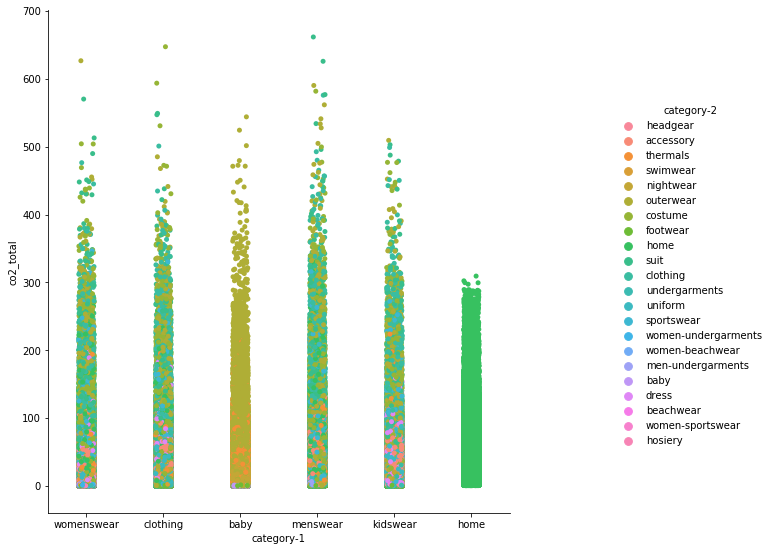

In [60]:
plot_co2_categories = sns.catplot(x="category-1", y="co2_total", hue="category-2", data=df_co2);

fig = plot_co2_categories.fig
fig.set_size_inches(11.7, 8.27)
fig.savefig(f"{VISU_PATH}/CO2_vs_categories12_test.png", dpi=150) 

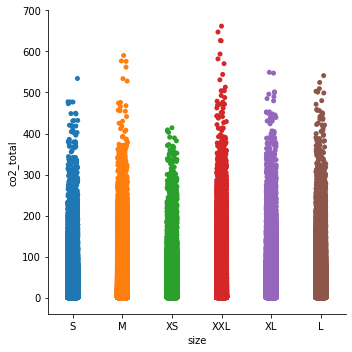

In [61]:
sns.catplot(x="size", y="co2_total", data=df_co2);

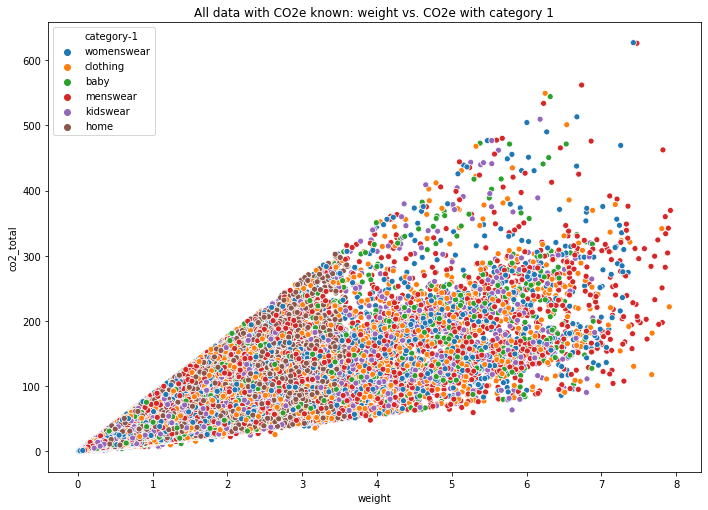

In [66]:
weight_co2 = sns.scatterplot(x="weight", y="co2_total", hue="category-1", data=df_co2)
weight_co2.set_title('All data with CO2e known: weight vs. CO2e with category 1')
fig = weight_co2.get_figure()
fig.set_size_inches(11.7, 8.27)
fig.savefig(f"{VISU_PATH}/Weight_vs_CO2_cat1.png", dpi=150) 

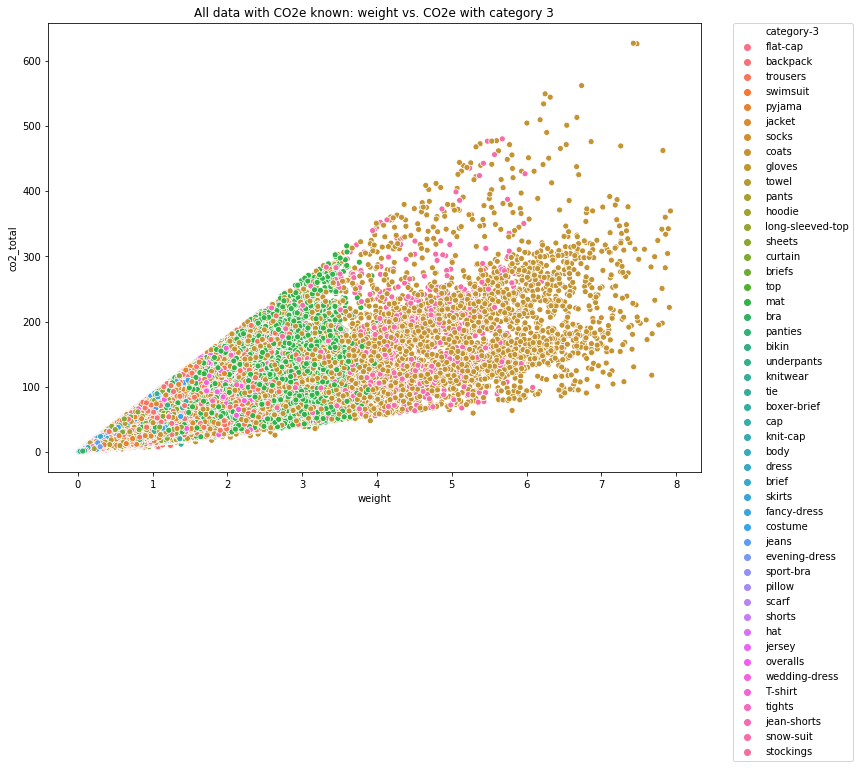

In [65]:
weight_co2_cat3 = sns.scatterplot(x="weight", y="co2_total", hue="category-3", data=df_co2)
weight_co2_cat3.set_title('All data with CO2e known: weight vs. CO2e with category 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = weight_co2_cat3.get_figure()
fig.set_size_inches(11.7, 8.27)
fig.savefig(f"{VISU_PATH}/Weight_vs_CO2_cat3.png", dpi=150) 

## Visualizations of a sample product category

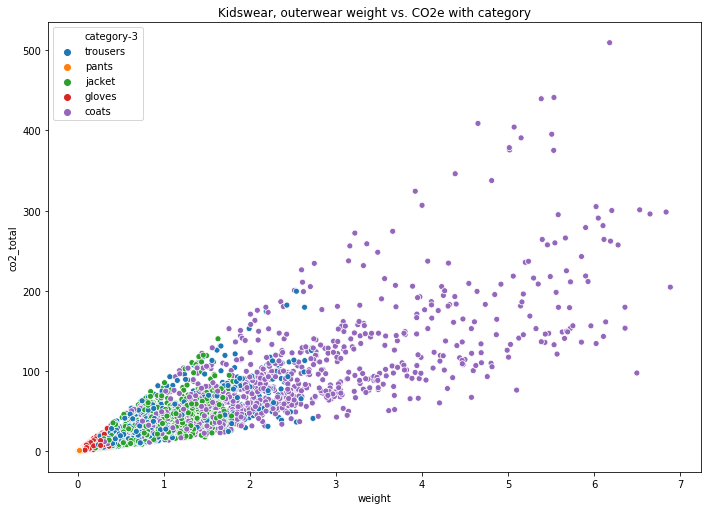

In [64]:
kids_outer_weight_co2 = sns.scatterplot(x="weight", y="co2_total", hue="category-3", data=df_co2[(df_co2["category-1"]=="kidswear") & (df_co2["category-2"]=="outerwear")])
kids_outer_weight_co2.set_title('Kidswear, outerwear weight vs. CO2e with category')
fig = kids_outer_weight_co2.get_figure()
fig.set_size_inches(11.7, 8.27)
fig.savefig(f"{VISU_PATH}/Kidswear_Outerwear_Weight_vs_CO2.png", dpi=150) 

In [17]:
df_co2.describe()

,co2_total,ftp_acrylic,ftp_cotton,ftp_elastane,ftp_linen,ftp_other,ftp_polyamide,ftp_polyester,ftp_polypropylene,ftp_silk,ftp_viscose,ftp_wool,label,unspsc_code,weight
count,1.699515e+06,788599.000000,815990.000000,788584.000000,957953.000000,787853.000000,958674.000000,957807.000000,787976.000000,825541.000000,787885.000000,816837.000000,0.0,0.0,680256.000000
mean,1.847729e+01,7.253467,24.691772,7.275649,26.577579,7.263382,26.564389,26.513184,7.264267,24.732870,7.268282,24.635947,NaN,NaN,0.521632
std,2.756457e+01,6.458145,29.563754,6.479071,30.308184,6.445177,30.278601,30.260166,6.470794,29.563829,6.465852,29.551267,NaN,NaN,0.698388
min,9.000000e-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.006000
25%,2.320000e+00,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,NaN,NaN,0.085000
50%,8.170000e+00,5.000000,9.000000,5.000000,10.000000,5.000000,10.000000,10.000000,5.000000,9.000000,5.000000,9.000000,NaN,NaN,0.264000
75%,2.433000e+01,10.000000,43.000000,10.000000,48.000000,10.000000,48.000000,48.000000,10.000000,43.000000,10.000000,43.000000,NaN,NaN,0.736000
max,6.616600e+02,69.000000,100.000000,69.000000,100.000000,69.000000,100.000000,100.000000,69.000000,100.000000,69.000000,100.000000,NaN,NaN,7.925000


In [41]:
df["category-1"].value_counts()

baby          2501063
menswear      2500822
womenswear    2500635
clothing      2500477
home          2499621
kidswear      2497382
Name: category-1, dtype: int64

In [42]:
df["category-2"].value_counts()

home                   2967962
footwear               1133994
nightwear              1133304
thermals               1126921
outerwear              1113787
accessory               632454
uniform                 630631
suit                    629518
swimwear                623119
headgear                622779
sportswear              622612
costume                 620061
clothing                614840
undergarments           609961
baby                    494379
dress                   460535
beachwear               294038
men-undergarments       165036
hosiery                 127360
women-beachwear         126879
women-undergarments     126657
women-sportswear        123173
Name: category-2, dtype: int64

In [43]:
df["category-3"].value_counts()

socks               1176185
pyjama              1133304
trousers             972198
swimsuit             722835
pants                670395
jacket               639090
backpack             632454
curtain              610509
mat                  610098
gloves               604117
sheets               591690
coats                583689
pillow               581915
towel                573750
body                 494379
costume              278493
long-sleeved-top     277327
knitwear             268381
skirts               265785
dress                234748
brief                205500
briefs               202502
underpants           201959
boxer-brief          165036
scarf                127000
bikin                126879
hat                  125795
cap                  124713
knit-cap             124526
sport-bra            123173
hoodie               122133
top                  121895
flat-cap             120745
wedding-dress        117009
T-shirt              116728
fancy-dress         

In [45]:
df["fabric_type"].value_counts()

K    11255727
W     3744273
Name: fabric_type, dtype: int64

In [46]:
fabric_cols = ["ftp_acrylic", "ftp_cotton", "ftp_elastane", "ftp_linen", 
               "ftp_other", "ftp_polyamide", "ftp_polyester", "ftp_polypropylene", 
               "ftp_silk", "ftp_viscose","ftp_wool"]
df["fabric_sum"] = df[fabric_cols].sum(axis=1)

In [47]:
df["fabric_sum"].describe()

count    1.500000e+07
mean     9.746370e+01
std      1.137650e+00
min      3.100000e+01
25%      9.700000e+01
50%      9.700000e+01
75%      9.800000e+01
max      1.000000e+02
Name: fabric_sum, dtype: float64

In [48]:
df["made_in"].value_counts()

CN    8014700
DE    1222383
US     931972
TR     806561
KR     663846
TW     623339
VN     561927
PK     539924
HK     500673
BD     263948
IN     257045
IT     248775
ES     135641
GB      67493
TH      13518
MX      13369
LV       6890
AU       6874
CO       6861
FI       6811
BR       6808
CY       6802
JP       6787
BG       6775
SE       6775
FR       6758
GR       6721
DK       6720
IE       6717
EG       6713
VE       6692
BE       6690
GE       6664
RO       6649
LT       6605
ML       6574
Name: made_in, dtype: int64

In [49]:
df["season"].value_counts()

SUM    985465
WIN    708431
MID    665187
AYR    605743
Name: season, dtype: int64

In [50]:
df["size"].value_counts()

L      2501226
S      2500560
XL     2500352
M      2499619
XXL    2499317
XS     2498926
Name: size, dtype: int64